In [1]:
from dDC_compute import parse, EShap, EShap_naive, input_gates
import pandas as pd
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import string

#### Taking very simple dD circuits for time comparisons

In [2]:
def easy_dD(numvars, nots):
    variables = list(string.ascii_uppercase)
    ckt = variables[-1]
    for i in range(numvars-1):
        if nots>0:
            ckt = ("AND", variables[i], ("NOT",ckt))
        else:
            ckt = ("AND", variables[i], ckt)
        nots -= 1
    return ckt

In [3]:
exp11 = easy_dD(1,0)
exp12 = ("NOT", exp11)

exp23 = easy_dD(2,0)
exp24 = easy_dD(2,1)

exp35 = easy_dD(3,0)
exp36 = easy_dD(3,1)
exp37 = easy_dD(3,2)

exp47 = easy_dD(4,0)
exp48 = easy_dD(4,1)
exp49 = easy_dD(4,2)
exp410 = easy_dD(4,3)

exp59 = easy_dD(5,0)
exp510 = easy_dD(5,1)
exp511 = easy_dD(5,2)
exp512 = easy_dD(5,3)
exp513 = easy_dD(5,4)

exp611 = easy_dD(6,0)
exp612 = easy_dD(6,1)
exp613 = easy_dD(6,2)
exp614 = easy_dD(6,3)
exp615 = easy_dD(6,4)
exp616 = easy_dD(6,5)

exp713 = easy_dD(7,0)
exp714 = easy_dD(7,1)
exp715 = easy_dD(7,2)
exp716 = easy_dD(7,3)
exp717 = easy_dD(7,4)
exp718 = easy_dD(7,5)
exp719 = easy_dD(7,6)

exp815 = easy_dD(8,0)
exp816 = easy_dD(8,1)
exp817 = easy_dD(8,2)
exp818 = easy_dD(8,3)
exp819 = easy_dD(8,4)
exp820 = easy_dD(8,5)
exp821 = easy_dD(8,6)
exp822 = easy_dD(8,7)

exp917 = easy_dD(9,0)
exp918 = easy_dD(9,1)
exp919 = easy_dD(9,2)
exp920 = easy_dD(9,3)
exp921 = easy_dD(9,4)
exp922 = easy_dD(9,5)
exp923 = easy_dD(9,6)
exp924 = easy_dD(9,7)
exp925 = easy_dD(9,8)

In [4]:
exps = [exp11,exp12,exp23,exp24,exp35,exp36,exp37,exp47,exp48,exp49,exp410,exp59,exp510,exp511,exp512,exp513,exp611,exp612,exp613,exp614,exp615,exp616,exp713,exp714,exp715,exp716,exp717,exp718,exp719,exp815,exp816,exp817,exp818,exp819,exp820,exp821,exp822,exp917,exp918,exp919,exp920,exp921,exp922,exp923,exp924,exp925]

In [5]:
def results(exp, deter = True):
    query = parse(exp, {}, [])
    data = pd.DataFrame({"t":list(input_gates(query)), "p":[1 if deter == True else random.random() for var in input_gates(query)]})
    shap_sum = 0
    shap_list = []
    shap_naive_list = []
    t_shap = []
    t_shap_naive = []
    for x in input_gates(query):
        t1 = time.time()
        eshap = EShap(query, x, data)
        t1 = time.time() - t1
        t_shap.append(t1)
        t2 = time.time()
        eshap_naive = EShap_naive(query, x, data)
        t2 = time.time() - t2
        t_shap_naive.append(t2)
        shap_sum += eshap
        shap_list.append(eshap)
        shap_naive_list.append(eshap_naive)
    return shap_list, shap_naive_list, t_shap, t_shap_naive

In [6]:
t_shaps = []
t_shaps_naive = []

for exp in exps:
    eshap, eshap_naive, t_shap, t_shap_naive = results(exp, deter = True)
    t_shaps.append(t_shap)
    t_shaps_naive.append(t_shap_naive)

In [ ]:
x_lab = ['1-1', '1-2', '2-3', '2-4', '3-5', '3-6', '3-7', '4-7', '4-8', '4-9', '4-10', '5-9', '5-10', '5-11', '5-12', '5-13', '6-11', '6-12', '6-13', '6-14', '6-15', '6-16', '7-13', '7-14', '7-15', '7-16', '7-17', '7-18', '7-19', '8-15', '8-16', '8-17', '8-18', '8-19', '8-20', '8-21', '8-22', '9-17', '9-18', '9-19', '9-20', '9-21', '9-22', '9-23', '9-24', '9-25']

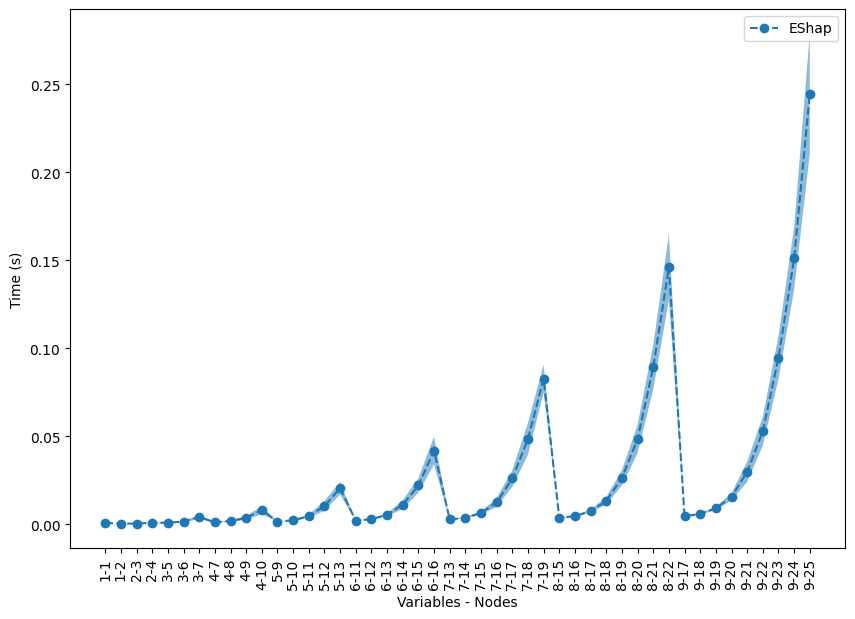

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(x_lab, [np.mean(t) for t in t_shaps], '--o', label = "EShap")
plt.fill_between(x_lab, [np.mean(t)+np.std(t) for t in t_shaps], [np.mean(t)-np.std(t) for t in t_shaps], alpha = 0.5)
plt.xlabel("Variables - Nodes")
plt.ylabel("Time (s)")
plt.xticks(rotation = 90)
plt.legend()
plt.savefig("Eshap.pdf")
plt.savefig("Eshap.png")
plt.show()

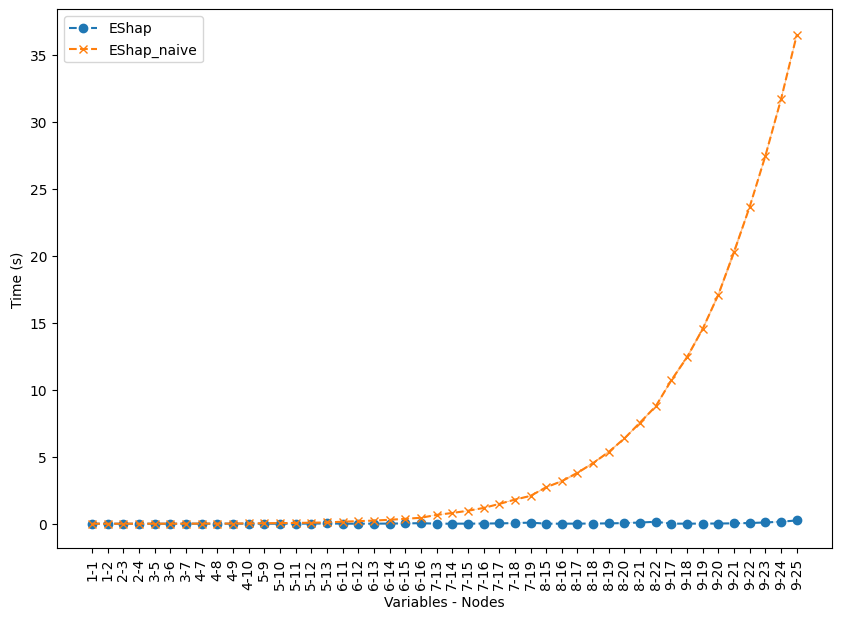

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(x_lab, [np.mean(t) for t in t_shaps], '--o', label = "EShap")
plt.fill_between(x_lab, [np.mean(t)+np.std(t) for t in t_shaps], [np.mean(t)-np.std(t) for t in t_shaps], alpha = 0.5)

plt.plot(x_lab, [np.mean(t) for t in t_shaps_naive], '--x', label = "EShap_naive")
plt.fill_between(x_lab, [np.mean(t)+np.std(t) for t in t_shaps_naive], [np.mean(t)-np.std(t) for t in t_shaps_naive], alpha = 0.5)
plt.xlabel("Variables - Nodes")
plt.xticks(rotation = 90)
plt.ylabel("Time (s)")
plt.legend()
plt.savefig("Eshap_vs_Eshap_naive.pdf")
plt.savefig("Eshap_vs_Eshap_naive.png")
plt.show()